In [2]:
'''
Training a unsupervised one layer NMF on 20 news group dataset, with 50% of observing data
'''

'\nTraining a unsupervised one layer NMF on 20 news group dataset, with 50% of observing data\n'

In [3]:
# import package
import torch
from torch.autograd import Variable
import Ipynb_importer
from deep_nmf import Deep_NMF, Energy_Loss_Func
from writer import Writer
from matplotlib import pyplot as plt
import numpy as np

importing Jupyter notebook from deep_nmf.ipynb
importing Jupyter notebook from lsqnonneg_module.ipynb
importing Jupyter notebook from writer.ipynb


In [4]:
# load the dataset for twenty news
from twenty_news_group_data_loading import data, Y, L20, L50, L90, sparsedata_cr_entr, sparsedata_L2#, get_whole_output

importing Jupyter notebook from twenty_news_group_data_loading.ipynb


In [5]:
# Define the network
m = data.shape[1]
k = 20
c = 20
lambd = 100
net = Deep_NMF([m, k], c)
loss_func = Energy_Loss_Func()
dataset = sparsedata_L2(data*1000, Y)

In [8]:
inputs.shape

torch.Size([50, 130107])

In [6]:
# Training process!

# setting training parameters
batchsize = 50
epoch = 5
lr_nmf = 10000
loss_lst = []
total_loss_lst = []
# train!
for epo in range(epoch):
    dataloader = torch.utils.data.DataLoader(dataset, batch_size = batchsize, shuffle = True)
    total_loss = 0
    for (i, (inputs, label)) in enumerate(dataloader):
        # train the lsqnonneg layers
        inputs = inputs.view([inputs.shape[0], inputs.shape[2]])
        label = label.view([label.shape[0], -1])
        inputs, label = Variable(inputs), Variable(label)
        S_lst = net(inputs)
        loss = loss_func(net, inputs, S_lst)
        loss.backward()
        loss_lst.append(loss.data)
        total_loss += loss.data
        print('training the nmf layer')
        print(loss.data)
        for A in net.lsqnonneglst.parameters():
            A.data = A.data.sub_(lr*A.grad.data)
            A.data = A.data.clamp(min = 0)
        # train the linear classifier
    print('epoch = ', epo, '\n', total_loss)
    total_loss_lst.append(total_loss)

TypeError: mm(): argument 'input' (position 1) must be Tensor, not list

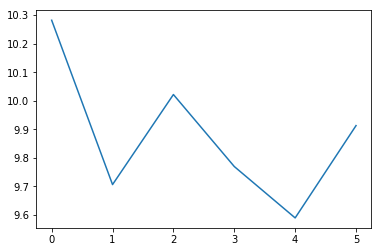

In [23]:
plt.plot(loss_lst)
plt.show()

In [39]:
# SAVE YOUR RESULT!!!!!
A = net.lsqnonneglst[0].A.data
B = net.linear.weight.data
A_np = A.numpy()
B_np = B.numpy()
np.save('semi_50_A', A_np)
np.save('semi_50_B', B_np)

In [43]:
# Doing forward propagation on the whole dataset, remember to SAVE S and prod!
def get_whole_output(net, dataset, param_lst = None):
    history = Writer()
    # initialize the network with certain initial value
    if param_lst is not None:
        for (i,param) in enumerate(net.parameters()):
            param.data = param_lst[i]
    # start to forward propagate, 100 at a time
    n = len(dataset)
    if n%100 == 0:
        batch_num = n/100
    else:
        batch_num = n//100 + 1
    print('batch_num = ', batch_num, '\n')
    for i in range(batch_num):
        print('current at batch:', i)
        try:
            (inputs, label, l_batch) = dataset[i*100:(i+1)*100]
        except:
            (inputs, label, l_batch) = dataset[i*100:]
        history.add_tensor('label', label)
        output, pred = net(inputs)
        history.add_tensor('output', output)
        history.add_tensor('pred', pred)
    return history

In [44]:
history = get_whole_output(net, dataset)

batch_num =  189 

current at batch: 0
current at batch: 1
current at batch: 2
current at batch: 3
current at batch: 4
current at batch: 5
current at batch: 6
current at batch: 7
current at batch: 8
current at batch: 9
current at batch: 10
current at batch: 11
current at batch: 12
current at batch: 13
current at batch: 14
current at batch: 15
current at batch: 16
current at batch: 17
current at batch: 18
current at batch: 19
current at batch: 20
current at batch: 21
current at batch: 22
current at batch: 23
current at batch: 24
current at batch: 25
current at batch: 26
current at batch: 27
current at batch: 28
current at batch: 29
current at batch: 30
current at batch: 31


KeyboardInterrupt: 

In [ ]:
# analyze the results

In [10]:
S_lst = np.load('20_news_group_S_lst.npy')
S_lst = [S_lst[i][0] for i in range(len(S_lst))]
S = torch.cat(S_lst,0)

In [13]:
A = np.load('20_news_group_A.npy')

In [15]:
# calculating the frobenious norm in batched form


(20, 130107)

In [16]:
data

<18846x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 2895521 stored elements in Compressed Sparse Row format>